In [1]:
import pandas as pd
import matplotlib.patches as mpatches

In [2]:
llm_df = pd.read_csv('/Users/jenevepilcher/llm-personas/data/LLM/04162024_llm_stance_7.csv')
llm_df

,Unnamed: 0,leaning,question,response
0,3600,7,abortion,1
1,3601,7,gunrights,3
2,3602,7,taxwaste,1
3,3603,7,riotsolution,7
4,3604,7,govservices,1
...,...,...,...,...
595,4195,7,gunrights,3
596,4196,7,taxwaste,1
597,4197,7,riotsolution,7
598,4198,7,govservices,1


In [3]:
human_df = pd.read_csv('/Users/jenevepilcher/llm-personas/data/ANES/04162024_anes_stance_7.csv')
human_df


,Unnamed: 0,leaning,abortion,gunrights,taxwaste,riotsolution,govservices,healthservices
0,1793,7,2,3,1,7,3,2
1,5910,7,2,3,1,7,3,3
2,1956,7,1,3,1,7,1,3
3,4521,7,2,1,1,7,1,2
4,1493,7,2,3,1,7,2,3
...,...,...,...,...,...,...,...,...
95,2316,7,1,2,1,7,1,2
96,7204,7,1,3,1,7,4,3
97,4378,7,2,3,1,7,7,3
98,407,7,2,2,1,7,1,2


In [4]:
import matplotlib.pyplot as plt

In [5]:
human_df_abortion = human_df['abortion'].value_counts()
human_df_abortion

abortion
2    49
1    38
3     7
4     6
Name: count, dtype: int64

In [6]:
llm_df_abortion = llm_df.loc[llm_df['question']=='abortion'].value_counts('response')
llm_df_abortion

response
1    100
Name: count, dtype: int64

In [7]:
q = llm_df.loc[llm_df['question']=='abortion']
set2 = q['response'].values

Text(0.5, 1.0, 'Extreme Conservative')

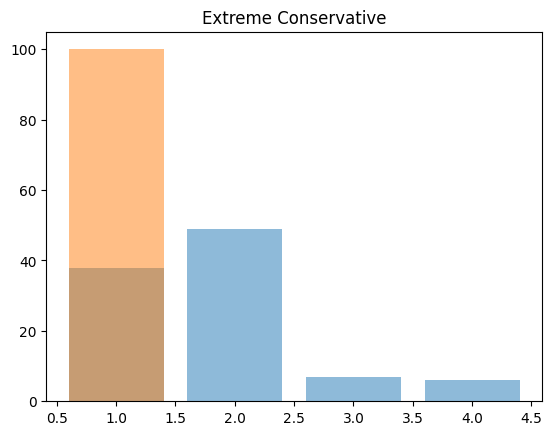

In [8]:
plt.bar(
    human_df_abortion.index,
    human_df_abortion.values,
    alpha=.5
)
plt.bar(
    llm_df_abortion.index,
    llm_df_abortion.values,
    alpha=.5
)
plt.title("Extreme Conservative")

In [9]:
import numpy as np

In [10]:
##every value for human data on specific question
set1 = human_df['abortion'].values
##has to locate all instances of the question first
q = llm_df.loc[llm_df['question']=='abortion']
##then finds every value in the response for this given question
##every value for LLM data on specific question
set2 = q['response'].values
intersection = len(set(set1).intersection(set(set2)))
union = len(set(set1).union(set(set2)))
abortion_sim = intersection / union
abortion_sim

0.25

In [11]:
llm_df_gunrights = llm_df.loc[llm_df['question']=='gunrights'].value_counts('response')
llm_df_gunrights

response
3    67
1    31
2     2
Name: count, dtype: int64

In [12]:
human_df_gunrights = human_df['gunrights'].value_counts()
human_df_gunrights

gunrights
3    73
2    16
1    11
Name: count, dtype: int64

Text(0.5, 1.0, 'Extreme Conservative')

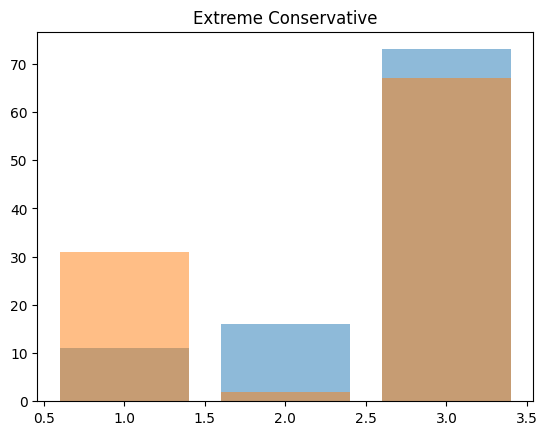

In [13]:
plt.bar(
    human_df_gunrights.index,
    human_df_gunrights.values,
    alpha=.5
)
plt.bar(
    llm_df_gunrights.index,
    llm_df_gunrights.values,
    alpha=.5
)
plt.title("Extreme Conservative")

In [14]:
##every value for human data on specific question
set1 = human_df['gunrights'].values
##has to locate all instances of the question first
q = llm_df.loc[llm_df['question']=='gunrights']
##then finds every value in the response for this given question
##every value for LLM data on specific question
set2 = q['response'].values

list1 = set1.tolist() if isinstance(set1, np.ndarray) else set1
list2 = set2.tolist() if isinstance(set2, np.ndarray) else set2

# Calculate intersection
intersection = sum(min(list1.count(x), list2.count(x)) for x in set(list1))

# Calculate union
union = sum(max(list1.count(x), list2.count(x)) for x in set(list1).union(set(list2)))

# Calculate Jaccard similarity
similarity = intersection / union
union

120

In [15]:
human_df_taxwaste = human_df['taxwaste'].value_counts()
human_df_taxwaste

taxwaste
1    81
2    18
3     1
Name: count, dtype: int64

In [16]:
llm_df_taxwaste = llm_df.loc[llm_df['question']=='taxwaste'].value_counts('response')
llm_df_taxwaste

response
1    100
Name: count, dtype: int64

In [17]:
human_tax = human_df['taxwaste'].value_counts().reset_index()
human_tax = human_tax.rename(columns={'taxwaste': 'taxwaste_human'})
human_tax

,taxwaste_human,count
0,1,81
1,2,18
2,3,1


In [18]:
llm_tax = llm_df.loc[llm_df['question']=='taxwaste'].value_counts('response').reset_index()
llm_tax = llm_tax.rename(columns={'taxwaste': 'taxwaste_llm'})
llm_tax

,response,count
0,1,100


In [19]:
focal = pd.merge(human_tax, llm_tax, left_on='taxwaste_human', right_on='response', how='outer')
focal

,taxwaste_human,count_x,response,count_y
0,1,81,1.0,100.0
1,2,18,NaN,NaN
2,3,1,NaN,NaN


In [20]:
focal = focal.fillna(value=0)
focal = focal.rename(columns={'count_x': 'human_count', 
'count_y': 'llm_count'})
focal = focal.drop(columns=['response'])

In [21]:
focal

,taxwaste_human,human_count,llm_count
0,1,81,100.0
1,2,18,0.0
2,3,1,0.0


In [22]:
focal['common'] = focal[['human_count', 'llm_count']].min(axis=1)
focal['union'] = focal[['human_count', 'llm_count']].max(axis=1)
focal['jaccard'] = focal['common']/focal['union']
focal

,taxwaste_human,human_count,llm_count,common,union,jaccard
0,1,81,100.0,81.0,100.0,0.81
1,2,18,0.0,0.0,18.0,0.00
2,3,1,0.0,0.0,1.0,0.00


In [23]:
for item in llm_df_taxwaste.items:
    

SyntaxError: incomplete input (789653460.py, line 2)

Text(0.5, 1.0, 'Extreme Conservative')

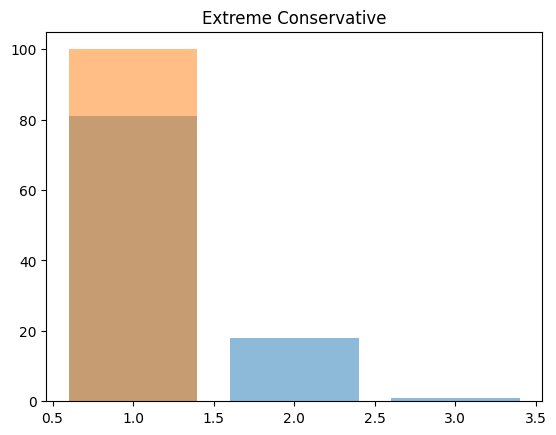

In [ ]:
plt.bar(
    human_df_taxwaste.index,
    human_df_taxwaste.values,
    alpha=.5
)
plt.bar(
    llm_df_taxwaste.index,
    llm_df_taxwaste.values,
    alpha=.5
)
plt.title("Extreme Conservative")

In [ ]:
human_df_riotsolution = human_df['riotsolution'].value_counts()
human_df_riotsolution

riotsolution
7    65
6    18
4     8
5     6
3     2
1     1
Name: count, dtype: int64

In [ ]:
llm_df_riotsolution = llm_df.loc[llm_df['question']=='riotsolution'].value_counts('response')
llm_df_riotsolution

response
7    100
Name: count, dtype: int64

Text(0.5, 1.0, 'Extreme Conservative')

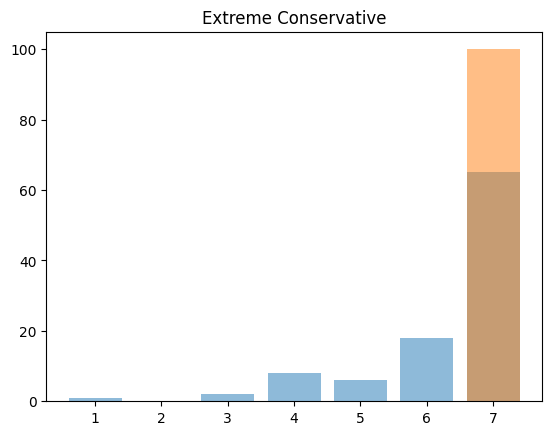

In [ ]:
plt.bar(
    human_df_riotsolution.index,
    human_df_riotsolution.values,
    alpha=.5
)
plt.bar(
    llm_df_riotsolution.index,
    llm_df_riotsolution.values,
    alpha=.5
)
plt.title("Extreme Conservative")

In [24]:
human_df_govservices = human_df['govservices'].value_counts()
human_df_govservices

govservices
1    30
2    21
4    17
3    12
7     9
5     7
6     4
Name: count, dtype: int64

In [25]:
llm_df_govservices = llm_df.loc[llm_df['question']=='govservices'].value_counts('response')
llm_df_govservices

response
1    100
Name: count, dtype: int64

Text(0.5, 1.0, 'Extreme Conservative')

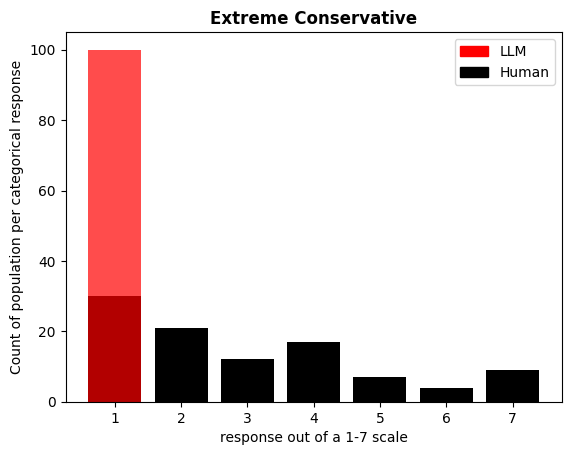

In [30]:
import matplotlib.patches as mpatches
plt.bar(
    human_df_govservices.index,
    human_df_govservices.values,
    alpha=1,
    color = 'black'
)
plt.bar(
    llm_df_govservices.index,
    llm_df_govservices.values,
    alpha=.7,
    color = 'red'
)
LLM_patch = mpatches.Patch(color='red', label='LLM')
human_patch = mpatches.Patch(color='black', label='Human')
plt.legend(handles=[LLM_patch,human_patch],loc="upper right")
plt.xlabel('response out of a 1-7 scale')
plt.ylabel('Count of population per categorical response')
plt.title("Extreme Conservative", weight='bold')

In [27]:
llm_df_healthservices = llm_df.loc[llm_df['question']=='healthservices'].value_counts('response')
llm_df_healthservices

response
1    100
Name: count, dtype: int64

In [28]:
human_df_healthservices = human_df['healthservices'].value_counts()
human_df_healthservices

healthservices
3    52
2    34
1    14
Name: count, dtype: int64

Text(0.5, 1.0, 'Extreme Conservative')

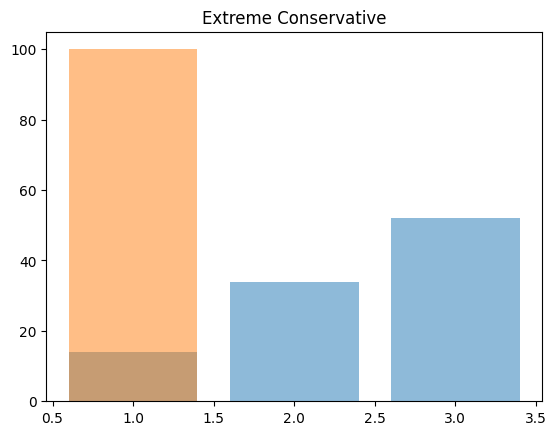

In [29]:
plt.bar(
    human_df_healthservices.index,
    human_df_healthservices.values,
    alpha=.5,
)
plt.bar(
    llm_df_healthservices.index,
    llm_df_healthservices.values,
    alpha=.5,
)
plt.title("Extreme Conservative")